# Longest valid parentheses

Get a row of random parentheses. Find a longest substring of valid parentheses

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Helper generator
def randpar(n):
    a = ['(',')']
    b = np.random.randint(0,2,n)
    return ''.join([a[i] for i in b])

s = randpar(21)
print(s)

)))())())()(())))((((


Closing 1 at 2 with length 2
Closing 0 at 3 with length 4
Closing 0 at 5 with length 6
Closing 0 at 11 with length 2


'(())()'

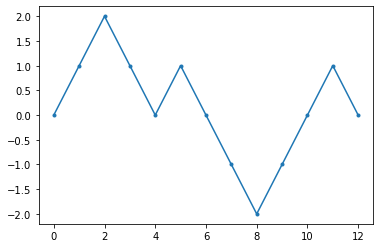

In [21]:
def longpar(s):
    a = {'(':1 , ')':-1}
    v = [a[i] for i in list(s)]     # A numerical representation of this sequence
    for i in range(len(v)):         # cumsum. Can be included in the loop below of course
        if i>0:
            v[i] += v[i-1]          # Now v[i] := net number of open (( to the left from i
    plt.plot([0]+v,'.-')
    
    left  = {0:-1}          # For each value v[i] we'll remember its best start...
    right = {0:-1}          # .. and best finish. A mountain, cut at level v[i].
    topl = topr = 0
    prev = 0
    for i in range(len(v)):
        if (prev<v[i]) or (v[i] not in left): # Going up or down for the first time
            left[v[i]]  = i                   # Remember where the mountain starts
            right[v[i]] = i                   # this one: whatevs
            #print('Started',v[i],'at',i)
        else: # Going down and not the first time: close stuff
            print('Closing',v[i],'at',i,'with length',i-left[v[i]])
            if i-left[v[i]] > topr-topl:      # See if it's a leader
                topl = left[v[i]]
                topr = i
            right[v[i]] = i # Do we even use this one? I don't think we actually use it anywhere...
        prev = v[i]
    #print(topl,topr)
    return ''.join(s[(topl+1):(topr+1)]) # topl is first time the level was reached, so (()) start AFTER it (thus +1)

# Test
s = '(())()))((()'
longpar(s)